In [1]:
import pandas

In [2]:
url = "https://www.parkrun.org.uk/{event}/results/latestresults/"

In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'}
events = {"Ruchill", 
          "Drumchapel", 
          #"ErskineWaterfront", 
          "Levengrove", 
          "Springburn", 
          "Victoria", 
          "Elderpark", 
          "Tollcross",
          "Pollok", 
          #"GanavanSands",
          #"FortWilliam",
          #"Aviemore",
          #"Torvean",
          #"Alness",
          #"Thurso",
          #"Kirkwall",
          #"Bressay",
          "Queensglasgow", 
          "Lanarkmoor", 
          "Plean",
          #"Greenock",
          #"Falkirk",
         }
event_data = {}
for event in events:
    if event.lower() in event_data:
        continue
    data = pandas.read_html(url.format(event=event.lower()), storage_options=headers)
    event_data[event.lower()] = data[0]

In [16]:
event_times = {}
for event in events:
    event_times[event] = event_data[event.lower()]['Time'].dropna().str[:5].str.split(":").apply(lambda x: int(x[0])+int(x[1])/60)

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import GaussianKDE
import matplotlib.patheffects as pe
import numpy as np

In [18]:
e = list(events)
e.sort(key=lambda x: np.sort(event_times[x])[len(event_times[x])//20])

In [19]:
class KentigernPlot:
    def __init__(self, *plotlayout, **kwargs):
        self.colors = ["#79C4F2", "#3BBCD9", "#038C8C", "#BDBF7E", "#8C3D20"]
        self.f, self.ax = plt.subplots(*plotlayout, dpi=300, **kwargs)
        for ax in self.f.axes:
            ax.set_prop_cycle('color', self.colors)
            ax.grid(color='white', linewidth=0.15)
        self.f.colors = self.colors
    def __enter__(self):
        return self.f
    def __exit__(self, exc_type, exc_value, exc_tb):
        for ax in self.f.axes:
            ax.set_xlabel(ax.get_xlabel(), fontdict={"fontsize": 7, "fontfamily": "Consolas"},
                                         path_effects=[pe.Stroke(linewidth=1, foreground='w'), pe.Normal()])
            ax.set_ylabel(ax.get_ylabel(), fontdict={"fontsize": 7, "fontfamily": "Consolas"},
                         path_effects=[pe.Stroke(linewidth=1, foreground='w'), pe.Normal()])

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            for label in ax.get_xticklabels():
                label.set_fontproperties({"size": 6, "family": "Consolas"},)
                label.set_path_effects([pe.Stroke(linewidth=1, foreground='w'), pe.Normal()])
            for label in ax.get_yticklabels():
                label.set_fontproperties({"size": 6, "family": "Consolas"},)
                label.set_path_effects([pe.Stroke(linewidth=1, foreground='w'), pe.Normal()])
            
            #ax.set_facecolor("#003B6B")
            if exc_tb:
                raise Exception(exc_tb)
        return self.f

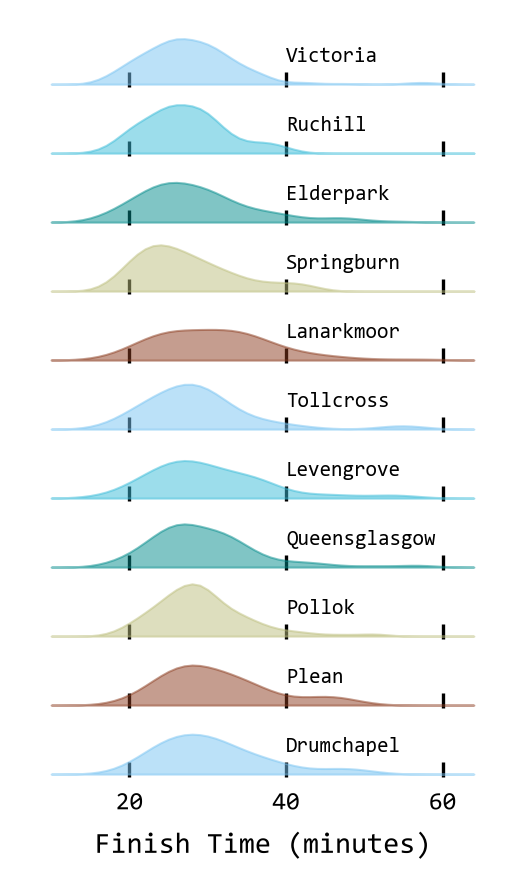

In [22]:
with KentigernPlot(len(events), 1, figsize=(2,0.3*len(events)), sharey=True, sharex=True) as fig:
    
    axis = range(10,65)
    for i, (event, ax) in enumerate(zip(e, fig.axes)):
        ax.fill_between(axis, 100*GaussianKDE(event_times[event].dropna())(axis), color=fig.colors[i%len(fig.colors)], alpha=0.5)
        #ax.plot(axis, 100*GaussianKDE(event_times[event].dropna())(axis), alpha=0.5, color="k", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])
        ax.set(yticklabels=[])
        ax.set(yticks=[])
        ax.grid(False)
        ax.text(40, 3.5, f"{event}", fontdict={"fontsize": 5, "fontfamily": "Consolas", 'color':'black'})
    #f.tight_layout()
    ax.set_xlabel("Finish Time (minutes)")
fig.savefig("parkrun-glasgow-fastest-2023-10-15.png")
    
    #f.savefig("parkrun-scotland-latest.jpg")

    #f.savefig("gsr-2022-finish-times.jpg")

In [13]:
print("Parkrun\t\t5th %le\tFastest\tRunners")
print("----------------------------------------")
for parkrun, times in event_times.items():
    q = times.quantile([0.05]).values[0]
    print(f"{parkrun:10}\t{q:.0f}:{60*(q%1):0>2.0f}\t{times[0]:0>2.0f}:{60*(times[0]%1):0>2.0f}\t{len(times)}")

Parkrun		5th %le	Fastest	Runners
----------------------------------------
Victoria  	19:16	17:34	437
Springburn	20:41	18:29	98
Plean     	23:15	22:38	28
Ruchill   	19:27	17:56	90
Levengrove	21:49	16:10	103
Queensglasgow	21:58	18:30	181
Lanarkmoor	20:26	20:56	70
Drumchapel	23:03	21:20	29
Elderpark 	20:33	17:55	110
Pollok    	21:12	18:01	283
Tollcross 	21:40	18:57	78


In [10]:
event_times[event].dropna()

0     24.850000
1     26.316667
2     27.400000
3     28.666667
4     28.700000
5     29.333333
6     29.833333
7     31.116667
8     31.216667
9     31.333333
10    31.616667
11    36.333333
12    36.350000
13    36.366667
14    39.566667
15    48.000000
16    48.300000
17    58.233333
18    58.250000
19    58.266667
Name: Time, dtype: float64

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'monospace' not found because none of the following families were found: Source Code Pro, Courier, Computer Modern Typewriter
/tmp/ipykernel_30888/83685147.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  f.tight_layout()


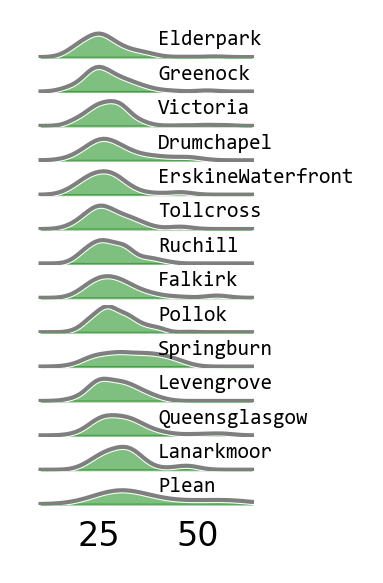

In [11]:
f, axes = plt.subplots(len(events), 1, dpi=300, figsize=(1,0.15*len(events)), sharey=True, sharex=True)
axis = range(10,65)
events
for event, ax in zip(e, axes.flat):
    ax.fill_between(axis, 100*GaussianKDE(event_times[event].dropna())(axis), alpha=0.5, color = 'green')
    ax.plot(axis, 100*GaussianKDE(event_times[event].dropna())(axis), alpha=0.5, color="black", linewidth=1, path_effects=[pe.Stroke(linewidth=1.5, foreground='w'), pe.Normal()])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set(yticklabels=[])
    ax.tick_params(left=False)
    ax.tick_params(bottom=False)
    ax.grid(False)
    ax.text(40, 3.5, f"{event}", fontdict={"fontsize": 5, "fontfamily": "Consolas"})
f.tight_layout()
#ax.set_xlabel("Finish Time (minutes)")

f.savefig("parkrun-scotland-latest.jpg")

#f.savefig("gsr-2022-finish-times.jpg")